In [1]:
import pandas as pd
import numpy as np
data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50,60]
a_sample_without_replacement = data['Population'].sample(5, replace = False) #sample without replacement
a_sample_with_replacement = data['Population'].sample(5, replace = True) #sample with replacement
print(a_sample_without_replacement)
print(a_sample_with_replacement)

2    85
8    50
5    13
1    48
0    47
Name: Population, dtype: int64
1    48
3    20
0    47
5    13
0    47
Name: Population, dtype: int64


In [2]:
print('Population mean is', data['Population'].mean())
print('Population varianc is', data['Population'].var(ddof=0))
print('Population standard is', data['Population'].std(ddof=0))
print('Population size is', data['Population'].count())

Population mean is 43.0
Population varianc is 571.8
Population standard is 23.912339910598458
Population size is 10


In [3]:
a_sample = data['Population'].sample(10, replace = True)
print('Sample mean is', a_sample.mean())
print('Sample varianc is', a_sample.var(ddof=1))
print('Sample standard is', a_sample.std(ddof=1))
print('Sample size is', a_sample.count())

Sample mean is 43.2
Sample varianc is 290.62222222222215
Sample standard is 17.047645650418186
Sample size is 10


In [4]:
Trial = 500
a_sample = data['Population'].sample(50, replace = True)
sample_variance_collection0 = [a_sample.var(ddof=0) for i in range (Trial)]
sample_variance_collection1 = [a_sample.var(ddof=1) for i in range (Trial)]
print('Population variance is', data['Population'].var(ddof=0))
print('average of sample variance with n is', pd.DataFrame(sample_variance_collection0)[0].mean())
print('average of sample variance with n-1 is', pd.DataFrame(sample_variance_collection1)[0].mean())

Population variance is 571.8
average of sample variance with n is 658.7375999999946
average of sample variance with n-1 is 672.181224489799


In [5]:
Fstsample = pd.DataFrame(np.random.normal(10,5, size = 30))
print('sample mean is', Fstsample[0].mean())
print('sample SD is', Fstsample[0].std(ddof=1))

sample mean is 9.95511875173675
sample SD is 5.314570123859737


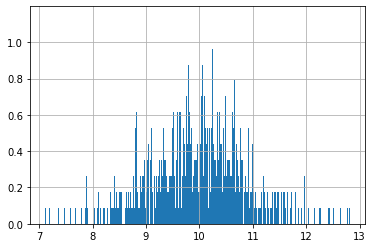

In [6]:
import matplotlib.pyplot as plt
meanlist =[]
varlist = []
for x in range(1000):
    sample = pd.DataFrame(np.random.normal(10,5, size = 30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof = 1))
  
    
collection = pd.DataFrame()
collection['meanlist'] = meanlist
collection['varlist'] = varlist
a = collection['meanlist']
b = collection['varlist']
a.hist(bins = 500, grid = True, density = 1)

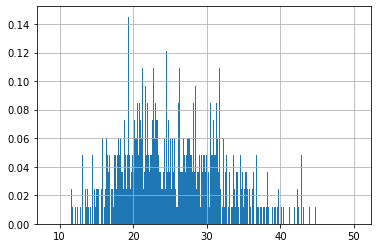

In [7]:
b.hist(bins = 500, grid = True, density = 1)


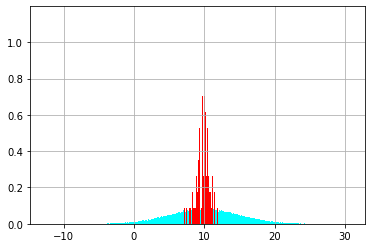

In [8]:
pop = pd.DataFrame(np.random.normal(10,5, size = 100000))
pop[0].hist(bins = 500, grid = True, density = 1, color = 'cyan')
a.hist(bins = 500, grid = True, density = 1, color = 'red')

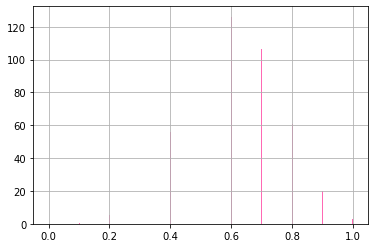

In [9]:
samplemeanlist = []
apop = pd.DataFrame([1,0,1,0,1])
for w in range (100000):
    sample = apop[0].sample(10, replace = True)
    samplemeanlist.append(sample.mean())
    
acolect = pd.DataFrame()
acolect['meanlist'] = samplemeanlist
a = acolect['meanlist']
a.hist(bins=500, grid = True, density = 1, color = 'hotpink')

# LAW OF CENTRAL LIMIT THEOREM AS N TENDS TO INFINITY THE SAMPLING DISTRIBUTION OF MEAN IS NORMAL WITH MEAN 0 AND VARIANCE 1

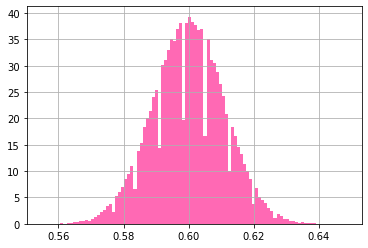

In [10]:
samplemeanlist = []
apop = pd.DataFrame([1,0,1,0,1])
for w in range (100000):
    sample = apop[0].sample(2000, replace = True)
    samplemeanlist.append(sample.mean())
    
acolect = pd.DataFrame()
acolect['meanlist'] = samplemeanlist
a = acolect['meanlist']
a.hist(bins=100, grid = True, density = 1, color = 'hotpink')

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [12]:
ms = pd.read_csv('microsoft.csv')
ms.head()
ms.info()
ms.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       780 non-null    object 
 1   Open       780 non-null    float64
 2   High       780 non-null    float64
 3   Low        780 non-null    float64
 4   Close      780 non-null    float64
 5   Adj Close  780 non-null    float64
 6   Volume     780 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 42.8+ KB


,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,58.912308,59.372308,58.465000,58.945397,56.931553,2.978900e+07
std,12.852040,12.868060,12.802831,12.830350,13.670080,1.522319e+07
min,40.340000,40.740002,39.720001,40.290001,37.267815,7.425600e+06
25%,47.894998,48.295000,47.535001,47.974998,44.792073,2.096685e+07
50%,56.150002,56.640001,55.700001,56.209999,53.775458,2.623125e+07
75%,67.892500,68.174997,67.447500,67.740000,66.565508,3.408020e+07
max,95.139999,96.070000,93.720001,95.010002,94.565781,1.691640e+08


In [13]:
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])
ms['logReturn']

0      0.006652
1     -0.009238
2     -0.014786
3      0.012625
4      0.028994
         ...   
775    0.024182
776   -0.007925
777   -0.026663
778   -0.042058
779         NaN
Name: logReturn, Length: 780, dtype: float64

#  CONFIDENCE INTERVAL

In [14]:
sample_size = ms['logReturn'].shape[0]
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / sample_size**0.5
z_value = norm.ppf(.95)
print(z_value)
left_interval = sample_mean - sample_std*z_value
Right_interval = sample_mean + sample_std*z_value
print('The mean lies between', (left_interval, Right_interval))
print('The sample mean is', sample_mean)

1.6448536269514722
The mean lies between (-1.5603253899378294e-05, 0.001656066226145423)
The sample mean is 0.0008202314861230223


In [15]:
import matplotlib.pyplot as plt
aapl = pd.read_csv('apple.csv')
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700


In [16]:
aapl['logReturn'] = np.log(aapl['Close'].shift(-1)) - np.log(aapl['Close'])
aapl['logReturn']

0      -0.010474
1       0.017396
2      -0.007323
3      -0.008185
4       0.005509
          ...   
2827   -0.025697
2828    0.000176
2829    0.002810
2830   -0.010873
2831         NaN
Name: logReturn, Length: 2832, dtype: float64

## Z-TEST (NORMLA DISTRIBUTION TEST OF SIGNIFICANCE)

In [17]:
xbar = aapl['logReturn'].mean()
n = aapl['logReturn'].count()
sd = aapl['logReturn'].std(ddof = 1)
zhat = (xbar-0)/(sd/n**.5) # we use xbar-0 bcos the hypothesis is miu = 0
print(zhat)

2.589208928659453


In [18]:
alpha = 0.05
z_left = norm.ppf(alpha/2)
z_right = -z_left
print((z_left, z_right))
print('At the significance level of', alpha)
print('Shall we reject:', zhat>z_right or zhat < z_left)

(-1.9599639845400545, 1.9599639845400545)
At the significance level of 0.05
Shall we reject: True


In [19]:
alpha = 0.05
z_right = norm.ppf(1-alpha)
print(z_right)
print('shall we reject:',zhat>z_right)

1.6448536269514722
shall we reject: True


In [20]:
#pvalue caluculation
alpha = 0.05
p = 2*(1-(norm.cdf(abs(zhat)))) #we multiply it by 2 bcos its a two tailed test
print(p)
print('shall we reject:', p<alpha)

0.009619670966225957
shall we reject: True


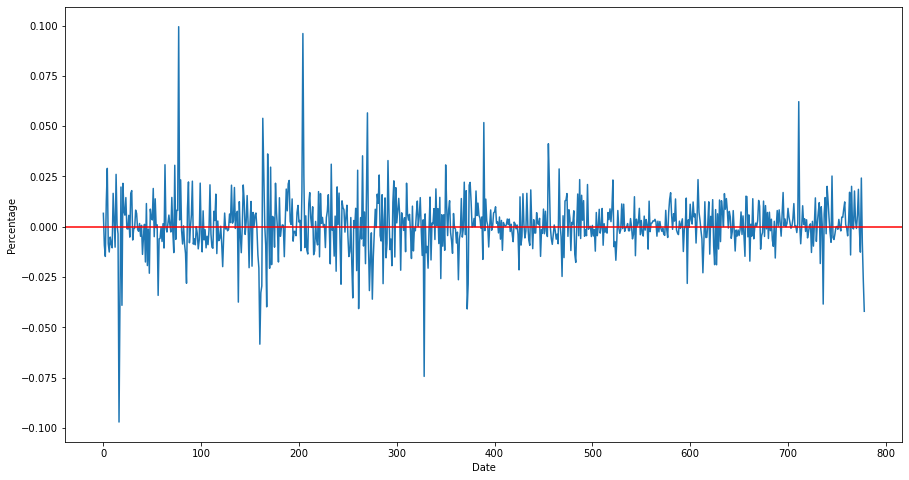

In [21]:
ms['logReturn'].plot(figsize=(15, 8))
plt.axhline(0, color='red')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.show()

## P-value

There is a typo about p-value in the video 3.4. Since this course will not be updated without new funding, 
the correct calculation of p-value is explained here in detail.  

    If Ha: mu not equal 0, it is two tail test and  p-value=2(1-norm.cdf(np.abs(z), 0, 1))

    if Ha: mu>0, it is upper tail test and  p-value=1-norm.cdf(z,0,1)

    if Ha:mu<0, it is lower tail test and  p-value=norm.cdf(z,0,1)



# LINEAR REGRESSION 

In [22]:
import pandas as pd
housing = pd.read_csv('housing.csv', index_col =0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [23]:
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [24]:
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


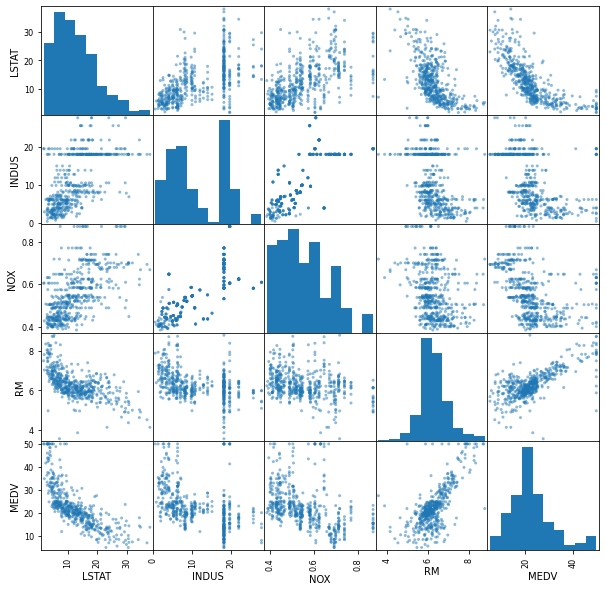

In [25]:
# matrix plot to visualize the relationship
pd.plotting.scatter_matrix(housing, figsize = (10,10))
import matplotlib.pyplot as plt
plt.show()

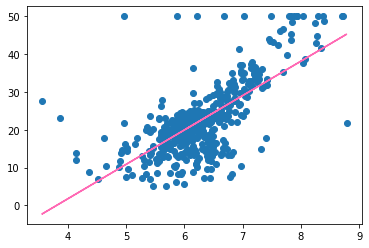

In [26]:
plt.scatter(housing['RM'],housing['MEDV'])
import numpy as np
m, b = np.polyfit(housing['RM'],housing['MEDV'],1) # the "1" after the code shows its of degree 1
plt.plot(housing['RM'],b+m*housing['RM'], color = 'hotpink')
plt.show()

In [27]:
b0 = 1
b1 =2
housing['guessresponse'] = b0 + b1*housing['RM'] #regression model
housing['observederror'] = housing['MEDV']-housing['guessresponse'] #error
indices = [7,20,100]
print(housing['observederror'].loc[indices])
print(' sum of square error is ', (housing['observederror']**2).sum()) #sum of square error

7      13.756
20      1.460
100    13.046
Name: observederror, dtype: float64
 sum of square error is  75291.32258800001


-34.67062077643857
9.102108981180308


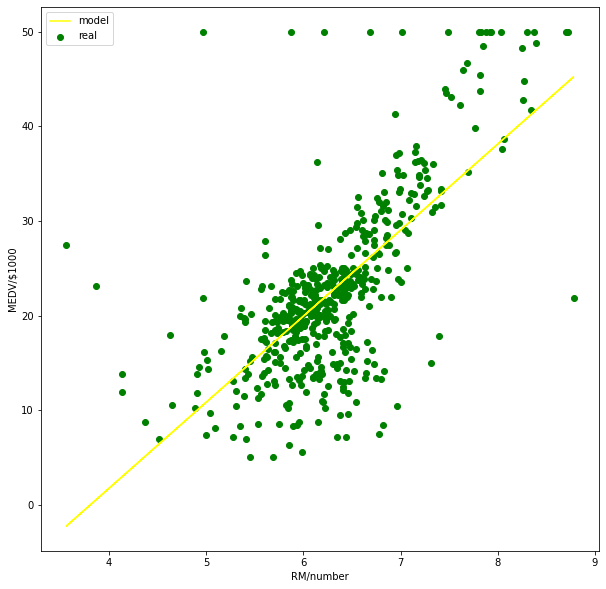

In [28]:
import statsmodels.formula.api as smf
import numpy as np
model = smf.ols(formula = 'MEDV~RM', data = housing).fit()
b0 = model.params[0]
b1 = model.params[1]
housing['bestresponse'] = b0 + b1*housing['RM']
plt.figure(figsize = (10,10))
plt.scatter(housing['RM'],housing['MEDV'], color = 'g', label = 'real')
#plt.plot(housing['RM'],housing['guessresponse'], color = 'g', label = 'real')
plt.plot(housing['RM'],housing['bestresponse'], color = 'yellow', label = 'model')
print(b0)
print(b1)
plt.ylabel('MEDV/$1000')
plt.xlabel('RM/number')
plt.xlim = np.min(housing['RM'])-2, np.max(housing['RM'])+2
plt.ylim = np.min(housing['MEDV'])-2, np.max(housing['MEDV'])+2
plt.legend()
plt.show()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           2.49e-74
Time:                        13:08:13   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MODEL ASSUMPTION
1. LINEARITY
2. INDEPENDENCE
3. NORMALITY
4. EQUAL VARIANCE


In [93]:
import statsmodels.formula.api as smf
import numpy as np
model = smf.ols(formula = 'MEDV~LSTAT', data = housing).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           5.08e-88
Time:                        17:54:32   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

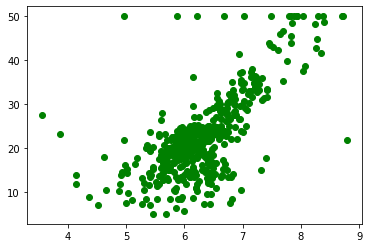

In [30]:
plt.scatter(housing['RM'], housing['MEDV'], color = 'g')
plt.show()

## LINEARITY: 
the graph above satisfy linearity assumption bcos the datapoints mostly follows straight line

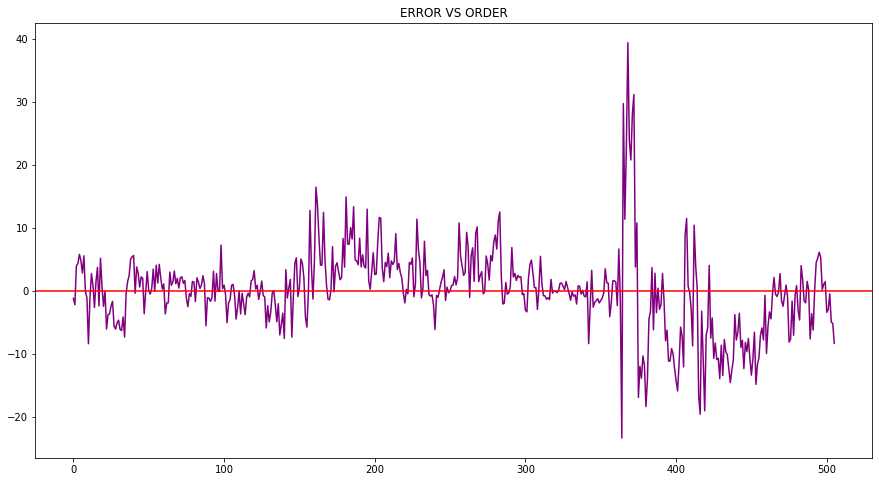

In [31]:
error= housing['MEDV'] - housing['bestresponse']
plt.figure(figsize=(15,8))
plt.title('ERROR VS ORDER')
plt.plot(housing.index, error, color = 'purple')
plt.axhline(y=0, color = 'red')
plt.show()

## INDEPENDENCE
There is no obvious pattern in this graph, which shows it satisfy the assumption but this is not only
method to assertain the assuption we need to check it mathematically by calculating durbin watson statistics,
and from the summary statistics we can see that 0.648 is doesn't falls between the interval 1.5 to 2.5 which means
the independence assuption is violated


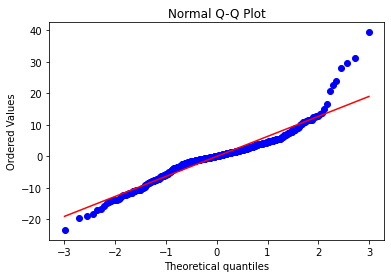

In [32]:
import scipy.stats as stats
z = error -error.mean()/error.std(ddof = 1) # standardized error
stats.probplot(z, dist = 'norm', plot=plt) #probability plot is in scipy.stats thats why we load the library
plt.title('Normal Q-Q Plot')
plt.show()


## NORMALITY ASSUMPTION
To validate normality assumption we plot standardized error by comparing it with normal distribution, 
if it follows normality the plot we form a 45degree plot i.e form a straight line from origin to upwardly. 
This one satisfy normality assumption.

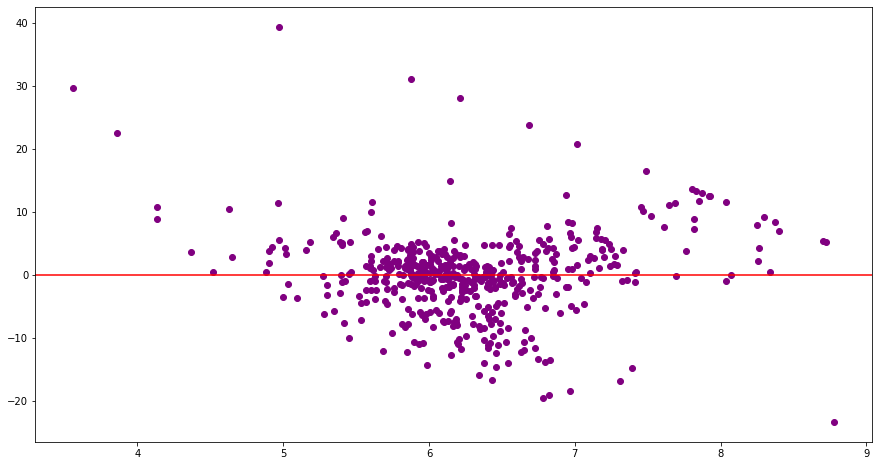

In [33]:
plt.figure(figsize = (15,8))
plt.scatter(housing['RM'], error, color = 'purple')
plt.axhline(y=0, color = 'red')
plt.show()

## EQUAL VARIANCE
To validate assumption of equal variance we'll plot predictor against error, if it satisfy the assumption
the plot we have no pattern but if it violated the assumption it will be an obvious pattern. In this graph variance is smaller 
for big houses thus the assumption is violated.

In [34]:
aord =pd.read_csv('ALLOrdinary.csv')
nikkei =pd.read_csv('Nikkei225.csv')
hsi = pd.read_csv('HSI.csv')
daxi = pd.read_csv('DAXI.csv')
cac40 = pd.read_csv('CAC40.csv')
sp500 = pd.read_csv('SP500.csv')
dji = pd.read_csv('DJI.csv')
nasdaq = pd.read_csv('nasdaq_composite.csv')
spy = pd.read_csv('SPY.csv')

In [35]:
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,146.529999,146.990005,143.880005,144.929993,116.593864,204935600
1,2008-01-03,144.910004,145.490005,144.070007,144.860001,116.537567,125133300
2,2008-01-04,143.339996,143.440002,140.910004,141.309998,113.681671,232330900
3,2008-01-07,141.809998,142.229996,140.100006,141.190002,113.585121,234991000
4,2008-01-08,142.080002,142.899994,138.440002,138.910004,111.750923,326365700


In [36]:
indicepanel = pd.DataFrame(index= spy.index)
indicepanel['spy'] = spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lagl'] = indicepanel['spy'].shift(1)
indicepanel['sp500'] = sp500['Open']-sp500['Open'].shift(1)
indicepanel['nasdaq'] = nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji'] = dji['Open']-dji['Open'].shift(1)
indicepanel['daxi'] = daxi['Open']-daxi['Open'].shift(1)
indicepanel['cac40'] = cac40['Open']-cac40['Open'].shift(1)
indicepanel['aord'] = aord['Close']-aord['Open']
indicepanel['hsi'] = hsi['Close']-hsi['Open']
indicepanel['nikkei'] = nikkei['Close']-nikkei['Open']
indicepanel['Price'] = spy['Open']

In [37]:
indicepanel.head()

,spy,spy_lagl,sp500,nasdaq,dji,daxi,cac40,aord,hsi,nikkei,Price
0,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,15.500000,-71.679688,-464.320313,146.529999
1,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-104.450195,-71.779785,-50.100097,-162.750000,-48.830078,144.910004
2,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,-27.990235,5.489746,-2.300293,515.349609,99.370117,143.339996
3,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-102.709961,-111.689941,-117.399903,216.951171,234.450195,141.809998
4,-2.990006,0.270004,1.640015,-7.179931,19.75000,33.680176,44.509766,-27.500000,-354.060547,-158.209961,142.080002


In [38]:
indicepanel.isnull().sum()

spy          1
spy_lagl     1
sp500        1
nasdaq       1
dji          1
daxi        11
cac40        3
aord         2
hsi         57
nikkei      57
Price        0
dtype: int64

In [39]:
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [40]:
indicepanel.isnull().sum()

spy         0
spy_lagl    0
sp500       0
nasdaq      0
dji         0
daxi        0
cac40       0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [41]:
indicepanel.to_csv('indicepanel.csv')
indicepanel.shape

(2678, 11)

In [42]:
Train = indicepanel.iloc[-2000:-1000]
Test = indicepanel.iloc[-1000:]
print((Train.shape), (Test.shape))

(1000, 11) (1000, 11)


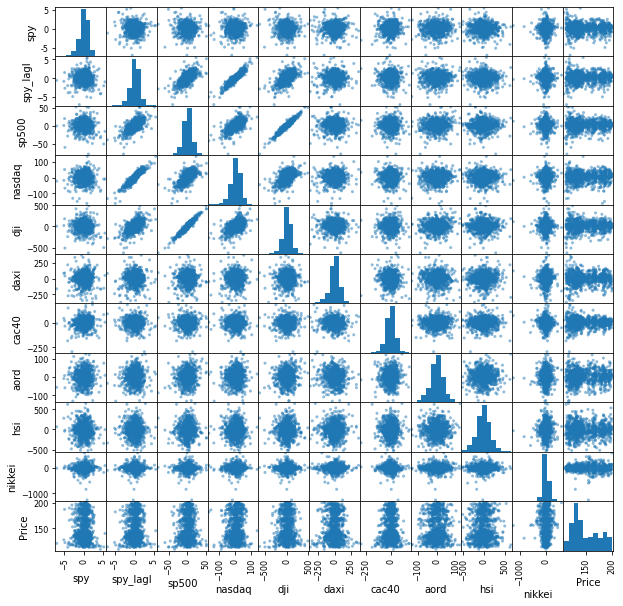

In [43]:
import pandas as pd
pd.plotting.scatter_matrix(Train, figsize = (10,10))
import matplotlib.pyplot as plt
plt.show()

In [44]:
Train.iloc[:, :-1].corr()

,spy,spy_lagl,sp500,nasdaq,dji,daxi,cac40,aord,hsi,nikkei
spy,1.000000,-0.011623,-0.018632,0.012333,-0.037097,0.019410,0.076886,0.048200,-0.038361,0.035379
spy_lagl,-0.011623,1.000000,0.664272,0.932118,0.575321,0.030278,-0.035791,0.039616,-0.015703,0.013315
sp500,-0.018632,0.664272,1.000000,0.636528,0.960032,0.000139,0.004462,0.127922,0.028705,0.004431
nasdaq,0.012333,0.932118,0.636528,1.000000,0.517313,0.040097,-0.023789,0.049933,-0.003305,0.006210
dji,-0.037097,0.575321,0.960032,0.517313,1.000000,-0.010432,0.008134,0.119396,0.026176,0.003770
daxi,0.019410,0.030278,0.000139,0.040097,-0.010432,1.000000,-0.015331,-0.080747,0.038492,0.004546
cac40,0.076886,-0.035791,0.004462,-0.023789,0.008134,-0.015331,1.000000,0.027647,0.026072,-0.054148
aord,0.048200,0.039616,0.127922,0.049933,0.119396,-0.080747,0.027647,1.000000,0.010722,0.024909
hsi,-0.038361,-0.015703,0.028705,-0.003305,0.026176,0.038492,0.026072,0.010722,1.000000,0.035837
nikkei,0.035379,0.013315,0.004431,0.006210,0.003770,0.004546,-0.054148,0.024909,0.035837,1.000000


In [47]:
import statsmodels.formula.api as smf
formular = ('spy~spy_lagl+sp500+nasdaq+dji+daxi+cac40+aord+hsi+nikkei')
model = smf.ols(formula=formular, data = Train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.133
Date:                Fri, 25 Feb 2022   Prob (F-statistic):             0.0245
Time:                        13:17:17   Log-Likelihood:                -1643.1
No. Observations:                1000   AIC:                             3306.
Df Residuals:                     990   BIC:                             3355.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0798      0.040      1.993      0.047       0.001       0.158
spy_lagl      -0.1233      0.092     -1.340      0.180      -0.304       0.057
sp500          0.0178      0.014      1.273      0.203      -0.010       0.045
nasdaq         0.0047      0.004      1.240      0.215      -0.003       0.012
dji           -0.0023      0.001     -1.588      0.113      -0.005       0.001
daxi           0.0003      0.000      0.724      0.469      -0.001       0.001
cac40          0.0021      0.001      2.485      0.013       0.000       0.004
aord           0.0017      0.001      1.497      0.135      -0.001       0.004
hsi           -0.0003      0.000     -1.412      0.158      -0.001       0.000
nikkei         0.0004      0.000      1.293      0.196      -0.000       0.001
==============================================================================
Omnibus:                       85.811   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.379
Skew:                          -0.444   Prob(JB):                     7.73e-52
Kurtosis:                       5.205   Cond. No.                         385.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-53-4259a4da3d3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['PredictedY'] = model.predict(Train)
<ipython-input-53-4259a4da3d3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['PredictedY'] = model.predict(Test)


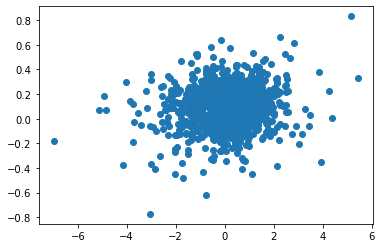

In [53]:
# PREDICTION
Train['PredictedY'] = model.predict(Train)
Test['PredictedY'] = model.predict(Test)
plt.scatter(Train['spy'], Train['PredictedY'])
#plt.plot(Train['PredictedY'], color = 'red')
plt.show()

In [72]:
def adjustedmetric(data,model,model_k,yname):
    data['yhat'] = model.predict(data)
    SST = (((data[yname]-data[yname].mean())**2).sum())
    SSR = (((data['yhat']-data[yname].mean())**2).sum())
    SSE = (((data[yname]-data['yhat'])**2).sum())
    r2 = SSR/SST
    adjustR2 = (1-(1-r2)*(data.shape[0]-1))/(data.shape[0]-model_k-1)
    RMSE = (SSE/(data.shape[0]-model_k-1))**.5
    return r2,adjustR2,RMSE

In [77]:
adjustedmetric(Train, model,9,'spy')

<ipython-input-72-25d0b87b7426>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat'] = model.predict(data)


(0.01902028442905956, -0.9888876119751208, 1.2575336814939866)

In [90]:
def assessTable(train,test,model,model_k,yname):
    r2test,RMSEtest,adjustR2test = adjustedmetric(test,model,model_k,yname)
    r2train,RMSEtrain,adjustR2train = adjustedmetric(train,model,model_k,yname)
    assessment = pd.DataFrame(index = ['R2','RMSE', 'adjustR2'], columns = ['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain, adjustR2train ]
    assessment['Test'] = [r2test, RMSEtest, adjustR2test]
    return assessment

In [91]:
assessTable(Test,Train,model,9,'spy')

<ipython-input-72-25d0b87b7426>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat'] = model.predict(data)


,Train,Test
R2,0.022496,0.019020
RMSE,-0.985381,-0.988888
adjustR2,1.759693,1.257534
